In [1]:
import tensorflow as tf
import math
import numpy as np

sess = tf.InteractiveSession()

In [2]:
# Make some fake data, 1 data points
image = np.random.randint(10,size=[1,10,10]) + np.eye(10)*10

In [3]:
image

array([[[ 10.,   3.,   6.,   4.,   9.,   5.,   4.,   1.,   7.,   7.],
        [  8.,  15.,   2.,   6.,   1.,   3.,   6.,   0.,   8.,   7.],
        [  6.,   3.,  17.,   7.,   0.,   9.,   4.,   1.,   1.,   2.],
        [  1.,   9.,   3.,  18.,   8.,   5.,   5.,   1.,   1.,   2.],
        [  7.,   0.,   4.,   9.,  18.,   9.,   9.,   5.,   3.,   6.],
        [  2.,   4.,   3.,   7.,   5.,  16.,   4.,   2.,   1.,   0.],
        [  1.,   7.,   4.,   9.,   9.,   9.,  18.,   8.,   0.,   3.],
        [  2.,   7.,   6.,   7.,   0.,   3.,   0.,  19.,   1.,   7.],
        [  7.,   7.,   3.,   8.,   6.,   5.,   5.,   4.,  11.,   8.],
        [  0.,   8.,   3.,   5.,   6.,   3.,   6.,   0.,   1.,  12.]]])

In [4]:
# TensorFlow placeholder
# None is for batch processing 
# (-1 keeps same size)
# 10x10 is the shape
# 1 is the number of "channels" 
# (like RGB colors or gray)
x = tf.placeholder("float", [None, 10, 10])
x_im = tf.reshape(x, [-1,10,10,1])

In [6]:
### Convolutional Layer

# Window size to use, 3x3 here
winx = 3
winy = 3

In [7]:
# How many features to compute on the window
num_filters = 2

In [8]:
# Weight shape should match window size
# The '1' represents the number of 
# input "channels" (colors)
W1 = tf.Variable(tf.truncated_normal([winx, winy,1, num_filters],stddev=1./math.sqrt(winx*winy)))

b1 = tf.Variable(tf.constant(0.1,shape=[num_filters]))

In [9]:
# 3x3 convolution, Pad with zeros on edges
# Strides is how to step, here 1 pixel at a time
xw = tf.nn.conv2d(x_im, W1,strides=[1, 1, 1, 1], padding='SAME')
h1 = tf.nn.relu(xw + b1)

In [10]:
# Remember to initialize!
sess.run(tf.initialize_all_variables())

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [11]:
# Peek inside
H = h1.eval(feed_dict = {x: image})

In [12]:
# Let's take a look
import matplotlib.pyplot as plt
plt.ion()

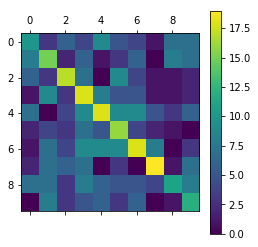

In [13]:

# Original
plt.matshow(image[0])
plt.colorbar()

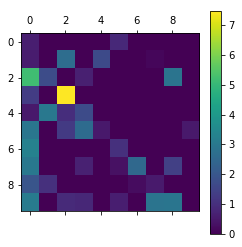

In [14]:
# Conv channel 1
plt.matshow(H[0,:,:,0])
plt.colorbar()

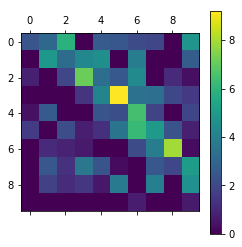

In [15]:
# Conv channel 2
plt.matshow(H[0,:,:,1])
plt.colorbar()
